# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y = iris.target 

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

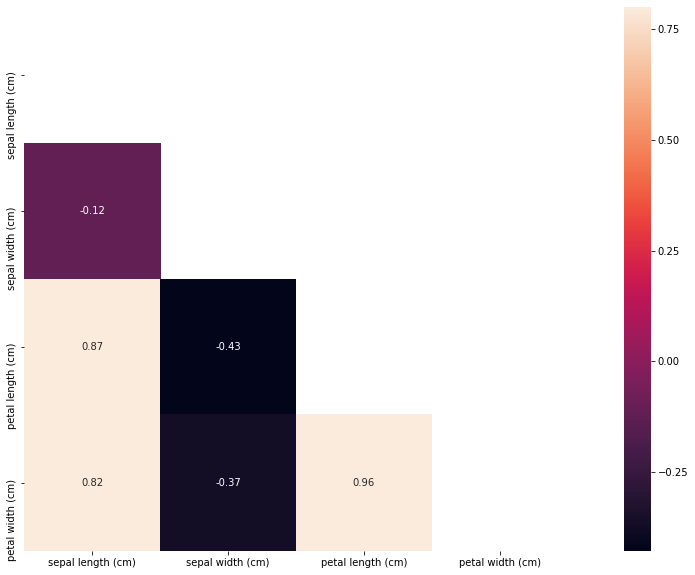

In [2]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
datacorr = data.corr()
mask = np.zeros_like(datacorr, dtype=np.bool) #disappear the same shape array
mask[np.triu_indices_from(mask)] = True #disappear upper-triangle

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(datacorr, mask=mask, vmax=0.8, annot=True, square=True)
plt.show()

In [3]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

ward_agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ward = ward_agg.fit_predict(X)

complete_agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_complete = complete_agg.fit_predict(X)

average_agg = AgglomerativeClustering(n_clusters=3, linkage='average')
y_average = average_agg.fit_predict(X)

In [4]:
print('ward:\n', y_ward, sep='')
print('complete:\n', y_complete, sep='')
print('average:\n', y_average, sep='')
print('True:\n', y, sep='')

ward:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
complete:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
average:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
True:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

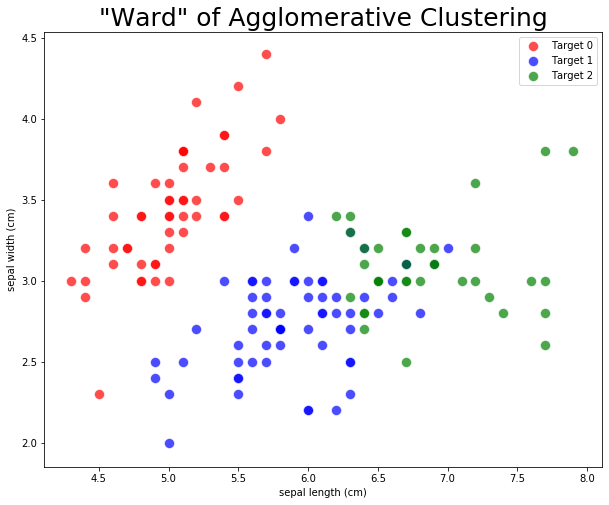

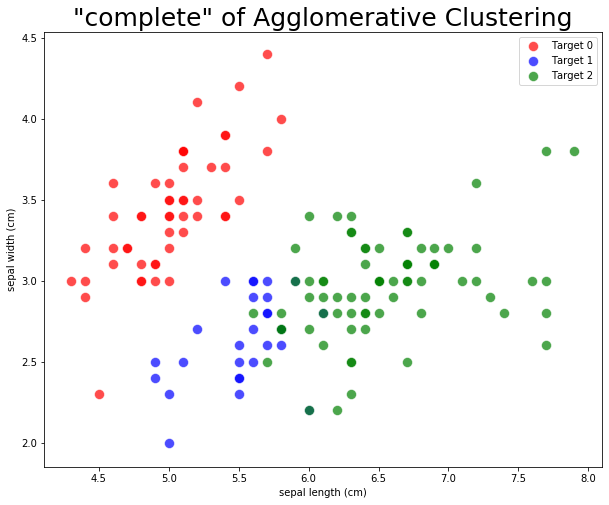

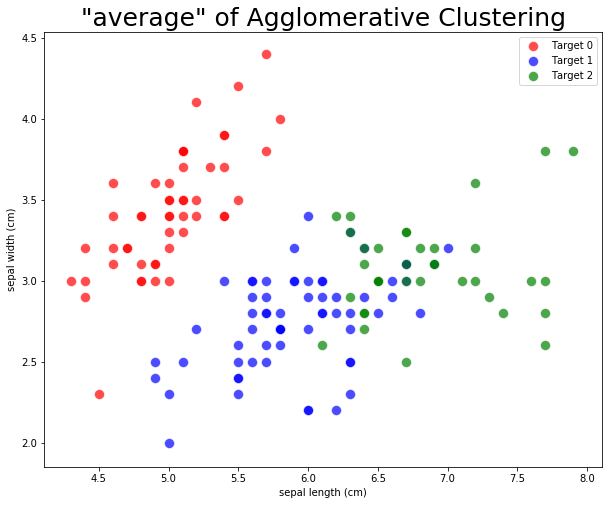

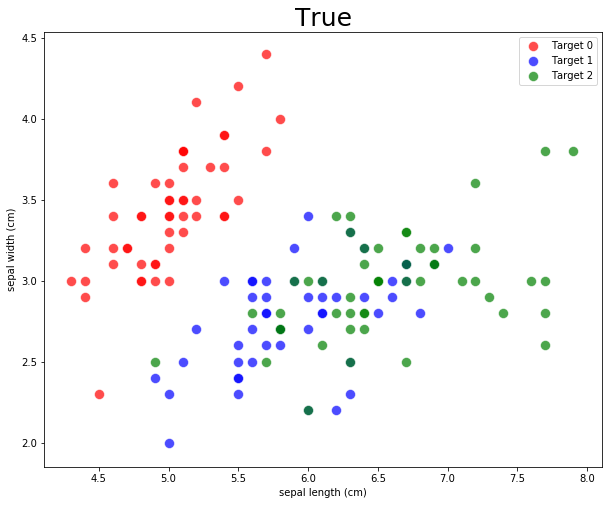

In [5]:
#Ward
plt.figure(figsize=(10,8))
sns.scatterplot(X[y_ward==1, 0], X[y_ward==1, 1], s=100, color='r', label='Target 0', alpha=0.7)
sns.scatterplot(X[y_ward==0, 0], X[y_ward==0, 1], s=100, color='b', label='Target 1', alpha=0.7)
sns.scatterplot(X[y_ward==2, 0], X[y_ward==2, 1], s=100, color='g', label='Target 2', alpha=0.7)
plt.title('"Ward" of Agglomerative Clustering', size=25)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
#complete
plt.figure(figsize=(10,8))
sns.scatterplot(X[y_complete==1, 0], X[y_complete==1, 1], s=100, color='r', label='Target 0', alpha=0.7)
sns.scatterplot(X[y_complete==2, 0], X[y_complete==2, 1], s=100, color='b', label='Target 1', alpha=0.7)
sns.scatterplot(X[y_complete==0, 0], X[y_complete==0, 1], s=100, color='g', label='Target 2', alpha=0.7)
plt.title('"complete" of Agglomerative Clustering', size=25)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
#average
plt.figure(figsize=(10,8))
sns.scatterplot(X[y_average==1, 0], X[y_average==1, 1], s=100, color='r', label='Target 0', alpha=0.7)
sns.scatterplot(X[y_average==0, 0], X[y_average==0, 1], s=100, color='b', label='Target 1', alpha=0.7)
sns.scatterplot(X[y_average==2, 0], X[y_average==2, 1], s=100, color='g', label='Target 2', alpha=0.7)
plt.title('"average" of Agglomerative Clustering', size=25)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


plt.figure(figsize=(10,8))
sns.scatterplot(X[y==0, 0], X[y==0, 1], s=100, color='r', label='Target 0', alpha=0.7)
sns.scatterplot(X[y==1, 0], X[y==1, 1], s=100, color='b', label='Target 1', alpha=0.7)
sns.scatterplot(X[y==2, 0], X[y==2, 1], s=100, color='g', label='Target 2', alpha=0.7)
plt.title('True', size=25)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

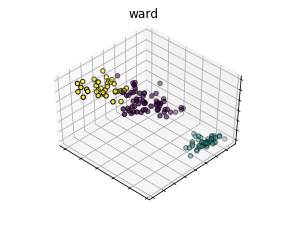

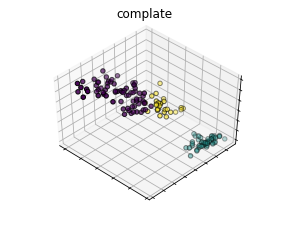

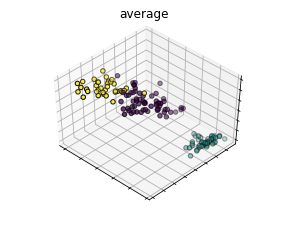

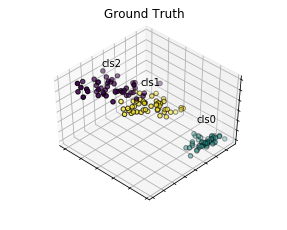

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fignum = 1
titles = ['ward', 'complate', 'average']
estimators = [ward_agg, complete_agg, average_agg]
for name, est in zip(titles, estimators):
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()